## Preparando o ambiente

In [4]:
# instalações
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Análise exploratória
Cabe ressaltar que os valores foram coletados em período de temporada(verão), logo podem não representar a média anual.

In [5]:
# Se for direto do webscrapping
## df = df_orig.copy(deep=True)

In [6]:
# Abrindo leitura csv guardado
name_file = 'calculadora_aluguel.csv'
df = pd.read_csv(name_file, sep=';')
#df_orig = pd.read_csv(name_file, sep=';')

In [7]:
# analisando tamanhos, itens nulos e types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2268 non-null   int64 
 1   product     2268 non-null   object
 2   area        2268 non-null   object
 3   room        2268 non-null   object
 4   bath        2268 non-null   object
 5   garage      2268 non-null   object
 6   adress      2268 non-null   object
 7   price       2268 non-null   object
dtypes: int64(1), object(7)
memory usage: 141.9+ KB


In [8]:
# confirmando estrutura do DF
df.head()

,Unnamed: 0,product,area,room,bath,garage,adress,price
0,0,"Sala/Conjunto para Aluguel, 30m²",30 m²,-- Quarto,1 Banheiro,1 Vaga,"Rua Joe Collaço, 341 - Córrego Grande, Florian...",R$ 1.400 /mês
1,1,"Casa com 3 Quartos para Aluguel, 230m²",30,3 Quartos,4 Banheiros,1 Vaga,"Rua João Henrique Gonçalves, 313 - Canto dos A...",R$ 16.000 /mês
2,2,"Ponto comercial/Loja/Box para Aluguel, 80m²",230 m²,-- Quarto,1 Banheiro,-- Vaga,"Rua Deputado Paulo Preis, 78 - Jurerê, Florian...",R$ 6.950 /mês
3,3,"Apartamento com 3 Quartos para Aluguel, 300m²",230,3 Quartos,5 Banheiros,2 Vagas,"Avenida Governador Irineu Bornhausen, 3690 - B...",R$ 9.950 /mês
4,4,"Consultório para Aluguel, 350m²",80 m²,-- Quarto,5 Banheiros,1 Vaga,"Rua Frei Caneca, 490 - Agronômica, Florianópol...",R$ 100 /mês


### Duplicados

In [9]:
# Analisando existência de duplicados
df.duplicated().sum()

108

In [10]:
# Identificando os itens duplicados
df[df.duplicated()].groupby(['product']).count()

,Unnamed: 0,area,room,bath,garage,adress,price
product,,,,,,,
"Apartamento com 2 Quartos para Aluguel, 101m²",2,2,2,2,2,2,2
"Apartamento com 2 Quartos para Aluguel, 62m²",1,1,1,1,1,1,1
"Apartamento com 2 Quartos para Aluguel, 66m²",1,1,1,1,1,1,1
"Apartamento com 2 Quartos para Aluguel, 70m²",4,4,4,4,4,4,4
"Apartamento com 2 Quartos para Aluguel, 71m²",2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
"Sala/Conjunto para Aluguel, 69m²",2,2,2,2,2,2,2
"Sala/Conjunto para Aluguel, 78m²",2,2,2,2,2,2,2
"Sala/Conjunto para Aluguel, 87m²",2,2,2,2,2,2,2


In [11]:
# Acessando primeiro item da series
_ = df[df.duplicated()].groupby(['product']).count().index.values
_[0]

'Apartamento com 2 Quartos para Aluguel, 101m²'

In [12]:
# Confirmando itens duplicados
df[df.duplicated()][df['product'] == _[0]]

<ipython-input-12-6ec1759d5486>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.duplicated()][df['product'] == _[0]]


,Unnamed: 0,product,area,room,bath,garage,adress,price
860,32,"Apartamento com 2 Quartos para Aluguel, 101m²",32 m²,2 Quartos,2 Banheiros,1 Vaga,"Avenida Engenheiro Max de Souza, 1370 - Coquei...",R$ 1.450 /mês
896,32,"Apartamento com 2 Quartos para Aluguel, 101m²",32 m²,2 Quartos,2 Banheiros,1 Vaga,"Avenida Engenheiro Max de Souza, 1370 - Coquei...",R$ 1.450 /mês


In [13]:
# Confirmando exclusão
total_df = len(df)
total_dupl = df.duplicated().sum()
total_exp = total_df - total_dupl
df = df.drop_duplicates()
total_new = len(df)

print(f'Total de itens do DF = {total_df}')
print(f'Itens duplicados = {total_dupl}')
print(f'Total de itens esparados após exclusão = {total_exp}')
print(f'Total de itens após exclusão = {total_new}')

Total de itens do DF = 2268
Itens duplicados = 108
Total de itens esparados após exclusão = 2160
Total de itens após exclusão = 2160


### Transformando os dados

* Product - selecionada a primeira informação
* Area - retirado 'm2' & transformar em int
* Room - retirado 'quarto' & transformar em int
* Bath - retirado 'banheiro' & transformar em int
* garage - retirado ''vaga' & inserido 0 nos '- -' & transformar em int
* adress - selecionado bairro
* price - retirado cifrão, definido valores/mês & retirado '/mês' e '/dia' & transformar em int# 

In [14]:
df

,Unnamed: 0,product,area,room,bath,garage,adress,price
0,0,"Sala/Conjunto para Aluguel, 30m²",30 m²,-- Quarto,1 Banheiro,1 Vaga,"Rua Joe Collaço, 341 - Córrego Grande, Florian...",R$ 1.400 /mês
1,1,"Casa com 3 Quartos para Aluguel, 230m²",30,3 Quartos,4 Banheiros,1 Vaga,"Rua João Henrique Gonçalves, 313 - Canto dos A...",R$ 16.000 /mês
2,2,"Ponto comercial/Loja/Box para Aluguel, 80m²",230 m²,-- Quarto,1 Banheiro,-- Vaga,"Rua Deputado Paulo Preis, 78 - Jurerê, Florian...",R$ 6.950 /mês
3,3,"Apartamento com 3 Quartos para Aluguel, 300m²",230,3 Quartos,5 Banheiros,2 Vagas,"Avenida Governador Irineu Bornhausen, 3690 - B...",R$ 9.950 /mês
4,4,"Consultório para Aluguel, 350m²",80 m²,-- Quarto,5 Banheiros,1 Vaga,"Rua Frei Caneca, 490 - Agronômica, Florianópol...",R$ 100 /mês
...,...,...,...,...,...,...,...,...
2263,31,"Apartamento com Quarto para Aluguel, 47m²",70,1 Quarto,1 Banheiro,1 Vaga,"Rua Hypólito Gregório Pereira, 137 - Canasviei...",R$ 1.900 /mês
2264,32,Casa com 4 Quartos à Venda/Aluguel 380m²,35 m²,4 Quartos,5 Banheiros,2 Vagas,"Avenida dos Búzios - Jurerê Internacional, Flo...",R$ 3.000 /dia\nR$ 5.500.000
2265,33,"Apartamento com 2 Quartos para Aluguel, 68m²",35,2 Quartos,1 Banheiro,1 Vaga,"Avenida Luiz Boiteux Piazza - Ponta das Canas,...",R$ 420 /dia
2266,34,"Apartamento com Quarto para Aluguel, 57m²",30 m²,1 Quarto,1 Banheiro,1 Vaga,"Servidão André Leal - Cachoeira do Bom Jesus, ...",R$ 260 /dia


In [15]:
# Coluna product - Filtro de informações pertinentes
df['product'] = [n.split(' ')[0].lower() for n in df['product']]

In [16]:
df['area'] = [int(n.split()[0]) for n in df['area']]

In [17]:
df['room'] = [int(n.strip().replace('--', '0')[0]) for n in df['room']]

In [18]:
df['bath']= [int(n.strip().replace('-', '0')[0]) for n in df['bath']]

In [19]:
df['garage'] = [int(n.strip().replace('-', '0')[0]) for n in df['garage']]

In [20]:
# Coluna adress
df['adress'] = [(n.split('-')[-2]).split(',')[-2].strip().lower() for n in df['adress']]

In [21]:
# Coluna price 
df['period'] = [n.split('/')[1][:3].strip() for n in df['price']]
df['price'] = [int(n.split(' ')[1].replace('.', '').strip()) for n in df['price']]

In [22]:
# Colunas product & adress - alterando caracteres especiais 
df['product'] = df['product'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df['adress'] = df['adress'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [23]:
# Coluna product - valores
df['product'].unique()

array(['sala/conjunto', 'casa', 'ponto', 'apartamento', 'consultorio',
       'galpao/deposito/armazem', 'cobertura', 'sobrado', 'imovel',
       'predio/edificio', 'kitnet/conjugado', 'loft', 'lote/terreno'],
      dtype=object)

In [24]:
df = df.replace('sala/conjunto', 'comercial').replace('ponto', 'comercial')
df = df.replace('imovel', 'comercial').replace('predio/edificio', 'edif_comercial')
df = df.replace('galpao/deposito/armazem', 'deposito').replace('kitnet/conjugado', 'kitnet')
df = df.replace('lote/terreno', 'lote')

In [25]:
# Confirmando alterações
df['product'].unique()

array(['comercial', 'casa', 'apartamento', 'consultorio', 'deposito',
       'cobertura', 'sobrado', 'edif_comercial', 'kitnet', 'loft', 'lote'],
      dtype=object)

### ## Valores inconsistentes | price & adress

* Transformação de valores diários para mensais
* Exclusão dos bairros 'barreiros'e 'campinas' não encontrados em Florianópolis (04 itens no total)

In [26]:
# Criando um df tratado para poder validar na íntegra os valores transformados
#df_trt = df.copy(deep=True)

In [27]:
df

,Unnamed: 0,product,area,room,bath,garage,adress,price,period
0,0,comercial,30,0,1,1,corrego grande,1400,mês
1,1,casa,30,3,4,1,canto dos aracas,16000,mês
2,2,comercial,230,0,1,0,jurere,6950,mês
3,3,apartamento,230,3,5,2,beira mar,9950,mês
4,4,consultorio,80,0,5,1,agronomica,100,mês
...,...,...,...,...,...,...,...,...,...
2263,31,apartamento,70,1,1,1,canasvieiras,1900,mês
2264,32,casa,35,4,5,2,jurere internacional,3000,dia
2265,33,apartamento,35,2,1,1,ponta das canas,420,dia
2266,34,apartamento,30,1,1,1,cachoeira do bom jesus,260,dia


In [28]:
# Verificando os valores com período 'dia'
day_value = df[df['period']=='dia']
print(f'O total de valores diários é {len(day_value)}')

O total de valores diários é 411


In [29]:
# Garantindo filtro adequado
len(df.loc[df.period == 'dia','price'])

411

In [30]:
# Transformando os valores diários em mensais (30 dias)
df.loc[df.period == 'dia','price'] = df.loc[df.period == 'dia','price'] * 30

In [31]:
# Deletando coluna period & Unnamed:0
df.drop(columns=['period'], inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2267
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  2160 non-null   object
 1   area     2160 non-null   int64 
 2   room     2160 non-null   int64 
 3   bath     2160 non-null   int64 
 4   garage   2160 non-null   int64 
 5   adress   2160 non-null   object
 6   price    2160 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 135.0+ KB


### Agrupandos dados
* Amostras desbalanceada entre residencial e comercial
* Excluído lote do df, por não pertencer a uma categoria específica de produto
* Área e preço comercial com média mais elevadas que residencial
* Agrupando por bairros teremos amostras desbalanceadas

In [32]:
#df_trt = df.copy(deep=True)

### Analisando | product 

#### Estatística descritiva

In [33]:
# Analisando possibilidade de agrupar >> Residenciais <<
resid = ['apartamento', 'cobertura', 'kitnet', 'loft', 'casa']

apt = df[df['product']=='apartamento'].describe()
cob = df[df['product']=='cobertura'].describe()
kit = df[df['product']=='kitnet'].describe()
loft = df[df['product']=='loft'].describe()
casa = df[df['product']=='casa'].describe()

print(f'apartamento: \n{apt} \n \ncobertura: \n{cob} \n \nkitnet: \n{kit} \n \nloft: \n{loft} \n \ncasa: \n{casa}')

apartamento: 
              area        room        bath      garage          price
count   824.000000  824.000000  824.000000  824.000000     824.000000
mean    187.569175    2.157767    1.854369    1.126214    7654.103155
std     392.900737    0.843451    0.943433    0.676703   11712.167646
min       0.000000    0.000000    1.000000    0.000000     650.000000
25%      54.000000    2.000000    1.000000    1.000000    1937.500000
50%      80.000000    2.000000    2.000000    1.000000    3175.000000
75%     158.500000    3.000000    2.000000    1.000000    9000.000000
max    5200.000000    4.000000    6.000000    3.000000  150000.000000 
 
cobertura: 
              area       room       bath     garage         price
count    50.000000  50.000000  50.000000  50.000000     50.000000
mean    181.920000   2.780000   2.780000   2.020000  14734.800000
std     401.962271   0.763718   1.717735   1.059264  10279.730251
min      10.000000   1.000000   1.000000   0.000000   1550.000000
25%      51

In [34]:
# Analisando possibilidade de agrupar >> Comerciais <<
comerc = ['comercial', 'consultorio', 'deposito']

com = df[df['product']=='comercial'].describe()
con = df[df['product']=='consultorio'].describe()
dep = df[df['product']=='deposito'].describe()
edif = df[df['product']=='edif_comercial'].describe()

print(f'comercial: \n{com} \n \nedif_comercial: \n{edif} \n \ndeposito: \n{dep} \n \nconsultorio: \n{con} ')

comercial: 
             area       room        bath      garage          price
count   800.00000  800.00000  800.000000  800.000000     800.000000
mean    217.23000    0.09000    1.256250    0.863750    7923.126250
std     517.16454    0.61634    1.277743    1.447517   23059.949116
min       3.00000    0.00000    0.000000    0.000000     200.000000
25%      50.00000    0.00000    1.000000    0.000000    1350.000000
50%      90.00000    0.00000    1.000000    0.000000    2500.000000
75%     200.00000    0.00000    1.000000    1.000000    7000.000000
max    5200.00000    8.00000    9.000000    9.000000  388650.000000 
 
edif_comercial: 
             area       room       bath     garage          price
count   21.000000  21.000000  21.000000  21.000000      21.000000
mean   159.809524   0.142857   3.000000   2.809524   73623.095238
std    132.234118   0.654654   1.923538   2.713283   85370.672766
min     30.000000   0.000000   0.000000   0.000000    6000.000000
25%     65.000000   0.0000

In [35]:
# Lote - retirado pois pode sre utilizado para ambos

lote = df[df['product']=='lote'].describe()
lote

,area,room,bath,garage,price
count,9.000000,9.0,9.000000,9.0,9.000000
mean,80.000000,0.0,0.111111,0.0,7800.000000
std,31.808018,0.0,0.333333,0.0,6664.082833
min,35.000000,0.0,0.000000,0.0,1500.000000
25%,56.000000,0.0,0.000000,0.0,4500.000000
50%,80.000000,0.0,0.000000,0.0,5500.000000
75%,94.000000,0.0,0.000000,0.0,8000.000000
max,140.000000,0.0,1.000000,0.0,20000.000000


In [36]:
# Agrupando os produtos
_ = df[df['product'].isin(['apartamento', 'cobertura', 'kitnet', 'loft', 'casa'])]
__ = df[df['product'].isin(['comercial', 'consultorio', 'deposito', 'edif_comercial'])]
___ = df[df['product'].isin(['casa'])]

print(f'residencial: \n{_.describe()} \n \ncomercial: \n{__.describe()} \n \ncasa: \n{___.describe()}')

residencial: 
              area         room         bath       garage          price
count  1309.000000  1309.000000  1309.000000  1309.000000    1309.000000
mean    193.346066     2.704354     2.454545     1.653934   19142.103896
std     368.219402     1.389835     1.620432     1.439459   42980.315493
min       0.000000     0.000000     1.000000     0.000000     600.000000
25%      54.000000     2.000000     1.000000     1.000000    2400.000000
50%      85.000000     3.000000     2.000000     1.000000    5500.000000
75%     182.000000     3.000000     3.000000     2.000000   16000.000000
max    5200.000000     9.000000     9.000000     9.000000  600000.000000 
 
comercial: 
              area        room        bath      garage          price
count   837.000000  837.000000  837.000000  837.000000     837.000000
mean    219.086022    0.089606    1.329749    0.916368    9780.867384
std     516.124579    0.611179    1.355032    1.519469   28161.230339
min       3.000000    0.000000    

In [37]:
df.describe()

,area,room,bath,garage,price
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,202.648148,1.679630,2.007870,1.359722,15462.592593
std,430.770629,1.716647,1.617537,1.512262,38048.862945
min,0.000000,0.000000,0.000000,0.000000,100.000000
25%,52.000000,0.000000,1.000000,0.000000,1900.000000
50%,85.500000,2.000000,2.000000,1.000000,4000.000000
75%,190.500000,3.000000,3.000000,2.000000,12750.000000
max,5200.000000,9.000000,9.000000,9.000000,600000.000000


#### Agrupando

In [38]:
# criando nova coluna
df['properties'] = df['product']

In [39]:
# Definindo os grupos
res = ['apartamento', 'cobertura', 'kitnet', 'loft', 'casa', 'sobrado']
com = ['comercial', 'consultorio', 'deposito', 'edif_comercial']
excluidos = ['lote']

In [40]:
df['properties'] = [n.replace(n, 'comercial') if n in com else n for n in df['properties']]

In [41]:
# Excluindo valores de lote
print(f'Tamanho do DF atual é de {len(df)} itens')

_ = df[df['properties'].isin(excluidos)]                          
print(f'Número total de lotes é {len(_)}')
      
df = df[~df['properties'].isin(excluidos)]
print(f'Tamanho do DF após exclusão dos itens é de {len(df)}')

Tamanho do DF atual é de 2160 itens
Número total de lotes é 9
Tamanho do DF após exclusão dos itens é de 2151


#### Analisando | adress 

In [42]:
# Agrupando adress
df['adress'].unique()

array(['corrego grande', 'canto dos aracas', 'jurere', 'beira mar',
       'agronomica', 'campeche', 'centro', 'trindade', 'joao paulo',
       'saco grande', 'itacorubi', 'estreito', 'canasvieiras', 'daniela',
       'jardim atlantico', 'capoeiras', 'carvoeira', 'saco dos limoes',
       'rio tavares', 'ingleses do rio vermelho', 'pantanal',
       'jurere internacional', 'ingleses norte', 'cachoeira do bom jesus',
       'ribeirao da ilha', 'santo antonio de lisboa', 'bom abrigo',
       'lagoa da conceicao', 'coqueiros', 'lagoinha do norte',
       'morro das pedras', 'ponta das canas', 'pantano do sul',
       'santa monica', 'barra da lagoa', 'parque sao jorge', 'canto',
       'monte verde', 'balneario', 'sao joao do rio vermelho',
       'costeira do pirajubae', 'praia dos ingleses', 'cacupe',
       'canto da lagoa', 'abraao', 'praia brava', 'monte cristo',
       'barreiros', 'vargem grande', 'vargem pequena', 'praia mole',
       'itaguacu', 'canajure', 'carianos', 'sambaqui'

In [43]:
# Zonas e bairros de florianópolis
norte = ['cacupe', 'santo antonio de lisboa','sambaqui', 'daniela',
         'jurere internacional', 'jurere',  'canasvieiras', 'ponta das canas', 
         'ingleses do rio vermelho', 'lagoinha do norte', 'praia brava', 'ratones', 
         'vargem pequena', 'cachoeira do bom jesus', 'vargem grande', 
         'sao joao do rio vermelho', 'ingleses norte', 'praia dos ingleses', 'vagem do bom jesus',
         'praia do forte', 'canajure']

leste = ['costa da lagoa', 'barra da lagoa', 'lagoa da conceicao', 'praia mole', 'canto dos aracas', 'canto da lagoa']

centro = ['corrego grande', 'beira mar', 'agronomica', 'pantanal', 'centro', 'trindade', 
          'joao paulo', 'saco grande', 'itacorubi', 'pantanal', 'santa monica', 'parque sao jorge',
         'monte verde', 'jose mendes', 'centro']

sul = ['campeche', 'saco dos limoes', 'rio tavares', 'ribeirao da ilha', 'morro das pedras', 
       'pantano do sul',  'costeira do pirajubae', 'armacao', 'carianos', 'tapera']

continental = [ 'estreito', 'jardim atlantico', 'capoeiras', 'carvoeira', 'bom abrigo',
               'coqueiros', 'canto', 'balneario', 'abraao', 'monte cristo', 'itaguacu',
               'canajure', 'carianos', 'coloninha', 'balneario do estreito', 'itaguacu']      

excluidos = ['barreiros', 'campinas'] # não é de Florianópolis

In [44]:
# Excluindo bairros que não encontrados em Florianópolis
print(f'Tamanho atual: {len(df)}')
_ = df[df['adress'].isin(excluidos)]
print(f'Tamanho itens incosistentes: {len(_)}')
df = df[~df['adress'].isin(excluidos)]
print(f'Tamanho após exclusão: {len(df)}')

Tamanho atual: 2151
Tamanho itens incosistentes: 4
Tamanho após exclusão: 2147


In [45]:
# Criando os grupos e Analisando tamanho das amostras - desbalanceada
n = df[df['adress'].isin(norte)]
l = df[df['adress'].isin(leste)]
c = df[df['adress'].isin(centro)]
s = df[df['adress'].isin(sul)]
cnt = df[df['adress'].isin(continental)]

print(f'Norte: {len(n)} \nLeste: {len(l)} \nCentro: {len(c)} \nSul: {len(s)} \nContinente: {len(cnt)}')

Norte: 567 
Leste: 47 
Centro: 1022 
Sul: 118 
Continente: 397


In [46]:
print(f'Norte: \n{n.describe()} \n \nLeste: \n{l.describe()} \n \nCentro: \n{c.describe()} \n \nSul: \n{s.describe()} \n \nContinente: \n{cnt.describe()}')

Norte: 
              area        room        bath      garage          price
count   567.000000  567.000000  567.000000  567.000000     567.000000
mean    185.624339    2.774250    2.776014    1.834215   36991.075838
std     309.804655    1.778903    1.944710    1.562828   58483.170950
min       3.000000    0.000000    0.000000    0.000000    1013.000000
25%      55.500000    2.000000    1.000000    1.000000    9250.000000
50%      86.000000    2.000000    2.000000    1.000000   17800.000000
75%     167.000000    4.000000    4.000000    2.000000   39000.000000
max    3400.000000    9.000000    9.000000    9.000000  600000.000000 
 
Leste: 
              area       room       bath     garage          price
count    47.000000  47.000000  47.000000  47.000000      47.000000
mean    191.787234   2.148936   2.361702   1.276596   26964.893617
std     215.893284   2.264842   1.737383   1.861534   52901.844008
min      24.000000   0.000000   0.000000   0.000000     650.000000
25%      55.5000

In [47]:
# Criando as categorias
df['neighborhood'] = [n.replace(n, 'norte') if n in norte else n for n in df['neighborhood']]
df['neighborhood'] = [n.replace(n, 'leste') if n in leste else n for n in df['neighborhood']]
df['neighborhood'] = [n.replace(n, 'centro') if n in centro else n for n in df['neighborhood']]
df['neighborhood'] = [n.replace(n, 'sul') if n in sul else n for n in df['neighborhood']]
df['neighborhood'] = [n.replace(n, 'continental') if n in continental else n for n in df['neighborhood']]

KeyError: 'neighborhood'

In [49]:
# Criando nova coluna 
df['neighborhood'] = df['adress']

In [50]:
# Criando as categorias
df['neighborhood'] = [n.replace(n, 'norte') if n in norte else n for n in df['neighborhood']]
df['neighborhood'] = [n.replace(n, 'leste') if n in leste else n for n in df['neighborhood']]
df['neighborhood'] = [n.replace(n, 'centro') if n in centro else n for n in df['neighborhood']]
df['neighborhood'] = [n.replace(n, 'sul') if n in sul else n for n in df['neighborhood']]
df['neighborhood'] = [n.replace(n, 'continental') if n in continental else n for n in df['neighborhood']]

In [51]:
# veirificando integridade dos dados
df[df['neighborhood']=='centro']

,product,area,room,bath,garage,adress,price,properties,neighborhood
0,comercial,30,0,1,1,corrego grande,1400,comercial,centro
3,apartamento,230,3,5,2,beira mar,9950,apartamento,centro
4,consultorio,80,0,5,1,agronomica,100,comercial,centro
6,comercial,300,0,1,0,centro,1400,comercial,centro
7,comercial,300,0,2,5,trindade,1770,comercial,centro
...,...,...,...,...,...,...,...,...,...
2258,comercial,56,0,0,1,centro,2000,comercial,centro
2259,comercial,56,4,2,0,trindade,4500,comercial,centro
2261,comercial,65,0,1,1,centro,95000,comercial,centro
2262,comercial,70,0,2,0,centro,6490,comercial,centro


In [52]:
df[df['adress'].isin(centro)]

,product,area,room,bath,garage,adress,price,properties,neighborhood
0,comercial,30,0,1,1,corrego grande,1400,comercial,centro
3,apartamento,230,3,5,2,beira mar,9950,apartamento,centro
4,consultorio,80,0,5,1,agronomica,100,comercial,centro
6,comercial,300,0,1,0,centro,1400,comercial,centro
7,comercial,300,0,2,5,trindade,1770,comercial,centro
...,...,...,...,...,...,...,...,...,...
2258,comercial,56,0,0,1,centro,2000,comercial,centro
2259,comercial,56,4,2,0,trindade,4500,comercial,centro
2261,comercial,65,0,1,1,centro,95000,comercial,centro
2262,comercial,70,0,2,0,centro,6490,comercial,centro


In [53]:
# Retirando variáveis não agrupadas
df = df.drop(columns=['product', 'adress'])

## Analisando distribuições
* Area - Numérica contínua
* Price - Numérica contínua

* Room - Categórica
* Bath - Categórica
* Garage - Categórica
* Properties - Categórica
* Neighborhood - Categórica

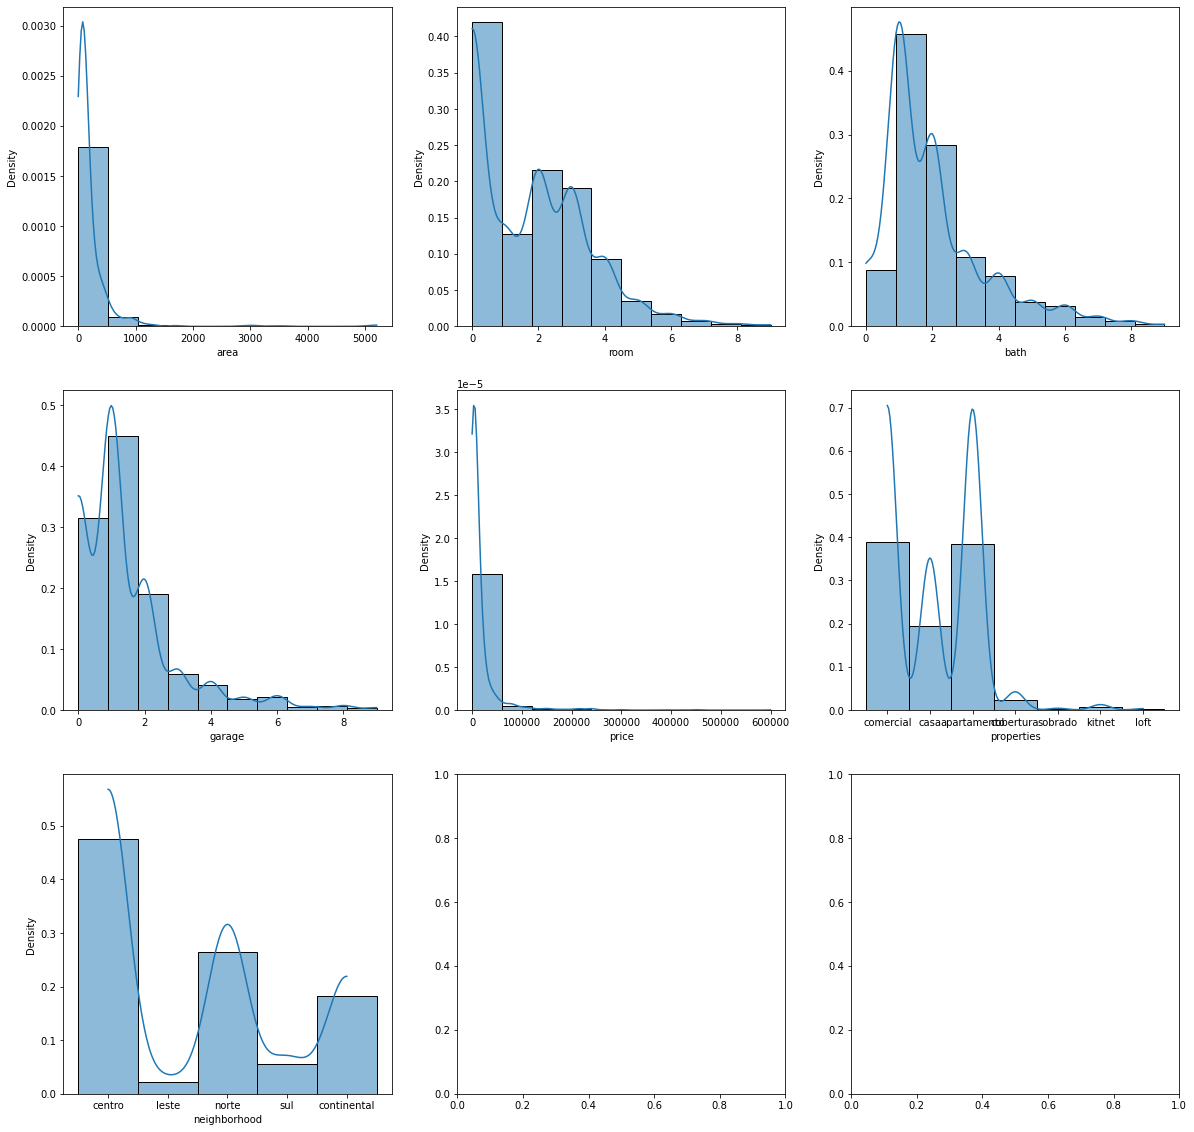

In [54]:
# Distribuição das Variáveis Contínuas
n_rows=3
n_cols=3
# Subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(20, 20)

for i, column in enumerate(df):
  sns.histplot(df[column], ax=axes[i//n_cols,i%n_cols], bins=10,  stat="density", kde=True)

plt.show()

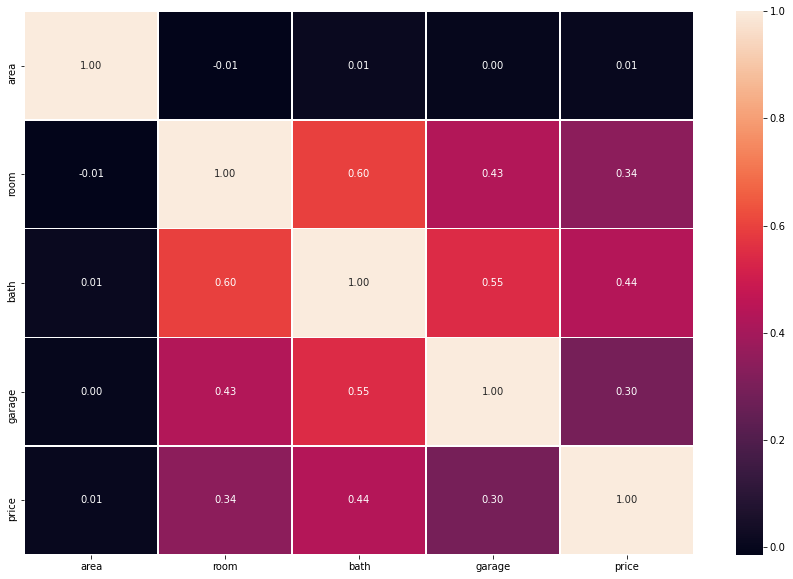

In [55]:
# Analisando correlação entre as variáveis contínuas 
big_corr = (df.corr())
plt.figure(figsize = (15,10))
sns.heatmap(data = big_corr, linewidths=.5, annot=True,  fmt=".2f")
plt.show()

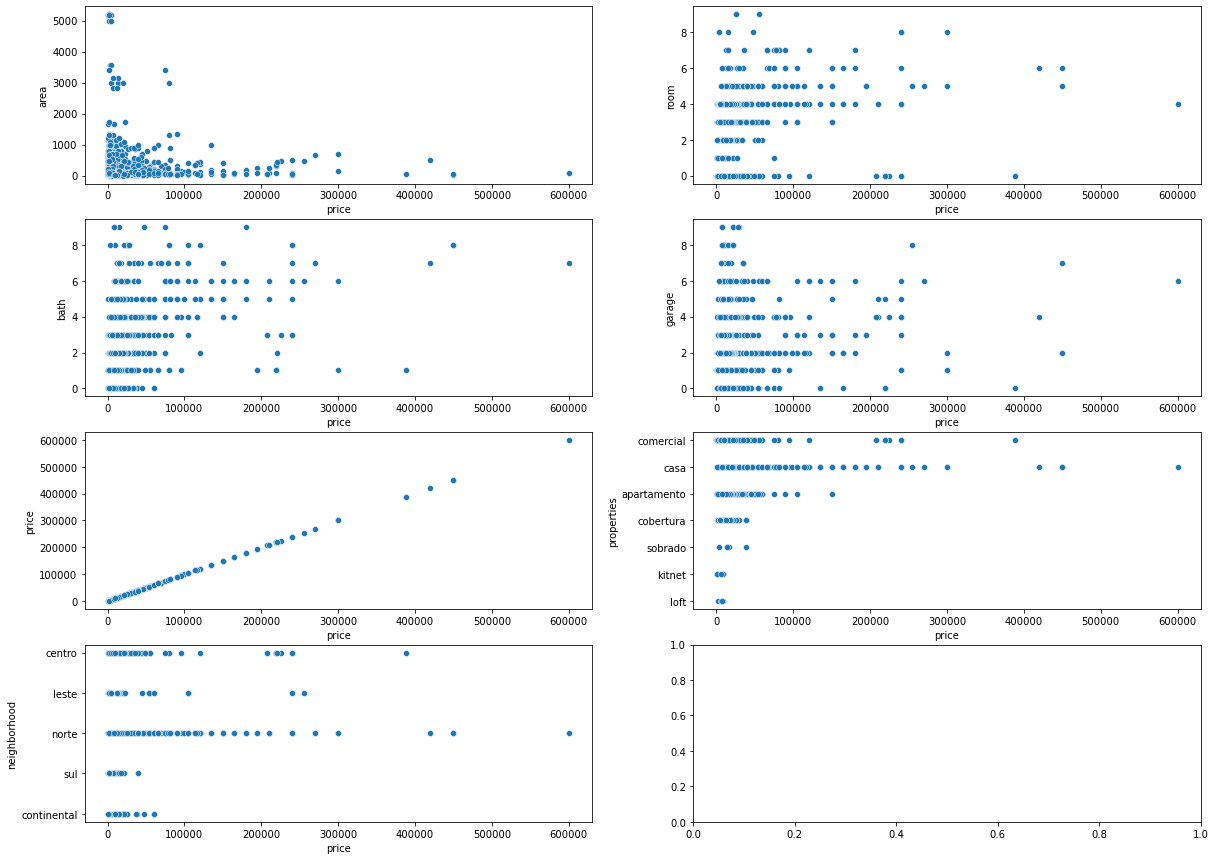

In [56]:
# Analisando variáveis contínuas com o target
n_rows=4
n_cols=2

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(20, 15)
for i, column in enumerate(df):
  sns.scatterplot(x=df.price, y=df[column], ax=axes[i//n_cols, i%n_cols])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2147 entries, 0 to 2267
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   area          2147 non-null   int64 
 1   room          2147 non-null   int64 
 2   bath          2147 non-null   int64 
 3   garage        2147 non-null   int64 
 4   price         2147 non-null   int64 
 5   properties    2147 non-null   object
 6   neighborhood  2147 non-null   object
dtypes: int64(5), object(2)
memory usage: 134.2+ KB
